### Load Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from imblearn.datasets import make_imbalance
import sklearn.cluster as cluster

In [2]:
#load the data
df = pd.read_csv('E_commerce.csv')
# to visualize all the columns at once.
pd.set_option('display.max_columns', None)

In [3]:
#fetch first five rows
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,891,A,Ship,3,4,266,2,high,F,33,3798,1
1,892,B,Ship,3,4,255,4,low,F,12,2266,1
2,893,C,Ship,4,1,166,3,high,F,3,1453,1
3,894,F,Ship,3,2,232,2,low,F,39,2139,1
4,895,D,Ship,3,5,198,2,medium,F,62,3015,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10109 non-null  int64 
 1   Warehouse_block      10109 non-null  object
 2   Mode_of_Shipment     10109 non-null  object
 3   Customer_care_calls  10109 non-null  int64 
 4   Customer_rating      10109 non-null  int64 
 5   Cost_of_the_Product  10109 non-null  int64 
 6   Prior_purchases      10109 non-null  int64 
 7   Product_importance   10109 non-null  object
 8   Gender               10109 non-null  object
 9   Discount_offered     10109 non-null  int64 
 10  Weight_in_gms        10109 non-null  int64 
 11  Reached.on.Time_Y.N  10109 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 947.8+ KB


In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10109.00000,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000
mean,5945.00000,4.091008,2.989316,211.794342,3.602236,11.671778,3747.578099,0.561183
std,2918.36127,1.143981,1.415152,47.967415,1.541395,14.791831,1632.358252,0.496267
min,891.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3418.00000,3.000000,2.000000,171.000000,3.000000,4.000000,1879.000000,0.000000
50%,5945.00000,4.000000,3.000000,217.000000,3.000000,7.000000,4295.000000,1.000000
75%,8472.00000,5.000000,4.000000,252.000000,4.000000,10.000000,5130.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,6000.000000,1.000000


In [6]:
# correlation matrix
corr = df.corr()
corr['Reached.on.Time_Y.N'].sort_values(ascending=True)

ID                    -0.347104
Weight_in_gms         -0.228124
Cost_of_the_Product   -0.049856
Customer_care_calls   -0.043790
Prior_purchases       -0.039121
Customer_rating        0.013327
Discount_offered       0.366228
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

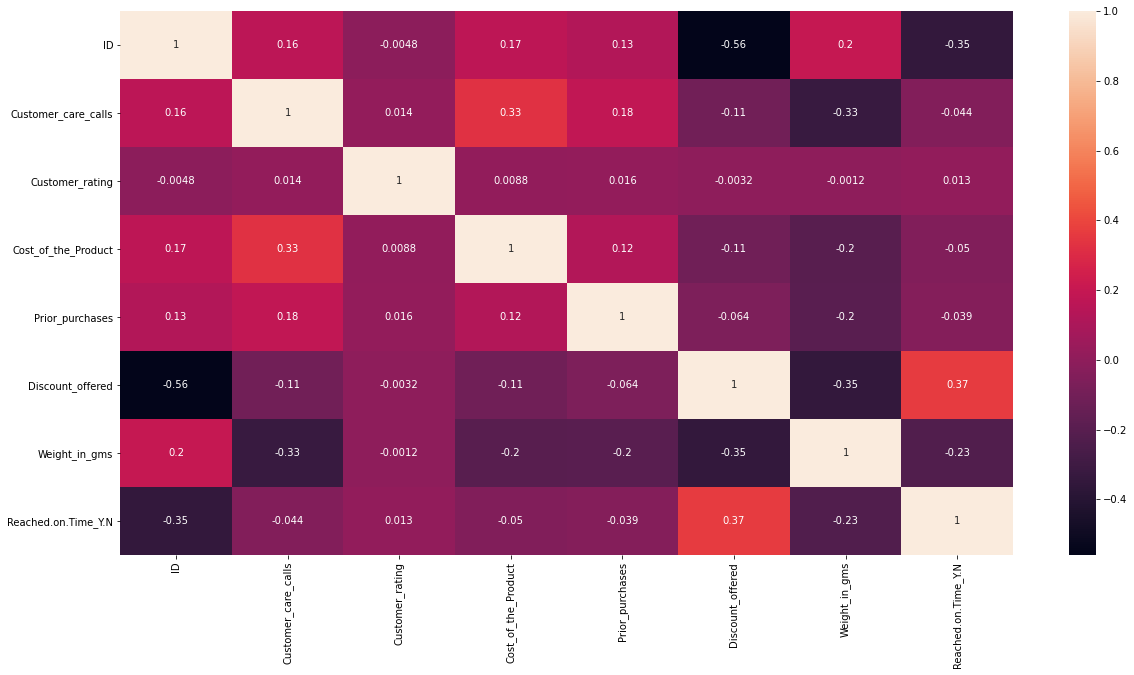

In [7]:
# plotting heatmap for obeserving correlation
sns.heatmap(data = corr, annot = True)
plt.gcf().set_size_inches(20,10)

In [8]:
df.shape

(10109, 12)

### Summary of Dataset features
- Total Data instances - 10109
- Total column - 12

### Data Pre-Processing

In [9]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df = pd.get_dummies(df, columns = ["Warehouse_block","Product_importance","Gender","Mode_of_Shipment"], drop_first = True)

In [12]:
df.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_low,Product_importance_medium,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,891,3,4,266,2,33,3798,1,0,0,0,0,0,0,0,0,1
1,892,3,4,255,4,12,2266,1,1,0,0,0,1,0,0,0,1
2,893,4,1,166,3,3,1453,1,0,1,0,0,0,0,0,0,1
3,894,3,2,232,2,39,2139,1,0,0,0,1,1,0,0,0,1
4,895,3,5,198,2,62,3015,1,0,0,1,0,0,1,0,0,1


### Summary of Pre-Processing
- The dataset has got no null values, we therefore create dummy variables for the floast type elements

### Univariate analysis for target feature

In [13]:
df['Reached.on.Time_Y.N'].value_counts()

1    5673
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [14]:
class_0, class_1 = df['Reached.on.Time_Y.N'].value_counts(normalize = True)
print(f'Class 0 before imbalance:', round(class_0 *100,1) ,'%')
print(f'Class 1 before imbalance:', round(class_1 *100,1) ,'%')

Class 0 before imbalance: 56.1 %
Class 1 before imbalance: 43.9 %


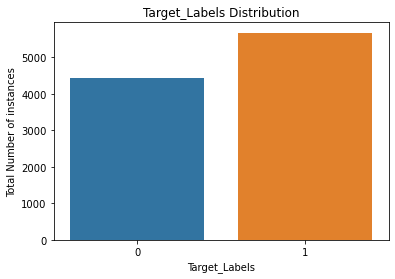

In [15]:
sns.countplot(x = 'Reached.on.Time_Y.N', data = df)
plt.title('Target_Labels Distribution')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Target_Labels Distributions.jpg')

### Imbalancing the target feature
- As mentioned in the project small imbalances of one class is fine, I'll proceed ahead with the further step 'making the target feature imbalance'

In [16]:
X = df.loc[:, df.columns != 'Reached.on.Time_Y.N']
y = df.loc[:,'Reached.on.Time_Y.N'].copy() # lets work with the copy without disturbing the original target feature

In [17]:
X.shape, y.shape

((10109, 16), (10109,))

In [18]:
# 65% imbalance
X_65, y_65 = make_imbalance(X, y, sampling_strategy={0:4436 , 1: 2385}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_65)}')

Distribution after imbalancing: Counter({0: 4436, 1: 2385})


In [19]:
class0 , class1 = y_65.value_counts(normalize = True)
print(f'Class 0 after imbalance:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance:', round(class1 *100,1) ,'%')

Class 0 after imbalance: 65.0 %
Class 1 after imbalance: 35.0 %


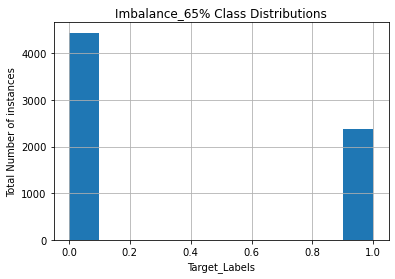

In [20]:
# 65% imbalance target feature
y_65.hist() 
plt.title('Imbalance_65% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_65% Class Distributions.jpg')

In [21]:
# Stratified Kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [22]:
skf = StratifiedKFold(n_splits=10, random_state = None)
rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = 42) #rf model

In [23]:
#Training with 65% imbalance surrogate
skf.get_n_splits(X_65, y_65)
score = []
precision = []
recall = []
for train_index, test_index in skf.split(X_65, y_65):
    #print('Train:' , train_index, 'Validation: ', test_index)
    x_train, x_test = X_65.iloc[train_index], X_65.iloc[test_index]
    y_train, y_test = y_65.iloc[train_index], y_65.iloc[test_index]
    rf_clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf_clf.predict(x_test))
    precision_s = precision_score(y_test, rf_clf.predict(x_test),average='macro')
    recall_s = recall_score(y_test, rf_clf.predict(x_test))
    score.append(acc)
    precision.append(precision_s)
    recall.append(recall_s)

In [26]:
#Metrics @ 65%
print('Mean Accuracy Score: {}   Accuracy std: {}'.format(np.array(score).mean(), np.array(score).std()))
print('Mean Precision Score: {}   Precision std: {}'.format(np.array(precision).mean(),  np.array(precision).std()))
print('Mean Recall Score: {}   Recall std: {}'.format(np.array(recall).mean(),  np.array(recall).std()))

Mean Accuracy Score: 0.7905001223685397   Accuracy std: 0.007983816033656018
Mean Precision Score: 0.8713708433705198   Precision std: 0.005898633826635833
Mean Recall Score: 0.40711824478745473   Recall std: 0.023863742563296732


In [27]:
# 75% imbalance
X_75, y_75 = make_imbalance(X, y, sampling_strategy={0:4436 , 1: 1475}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_75)}')

Distribution after imbalancing: Counter({0: 4436, 1: 1475})


In [28]:
class0 , class1 = y_75.value_counts(normalize = True)
print(f'Class 0 after imbalance_75%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_75%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_75%: 75.0 %
Class 1 after imbalance_75%: 25.0 %


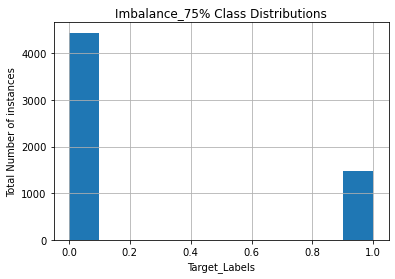

In [29]:
# 75% imbalance target feature
y_75.hist() 
plt.title('Imbalance_75% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_75% Class Distributions.jpg')

In [32]:
#Training with 75% imbalance surrogate
skf.get_n_splits(X_75, y_75)
score = []
precision = []
recall = []
for train_index, test_index in skf.split(X_75, y_75):
    #print('Train:' , train_index, 'Validation: ', test_index)
    x_train, x_test = X_75.iloc[train_index], X_75.iloc[test_index]
    y_train, y_test = y_75.iloc[train_index], y_75.iloc[test_index]
    rf_clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf_clf.predict(x_test))
    precision_s = precision_score(y_test, rf_clf.predict(x_test),average='macro')
    recall_s = recall_score(y_test, rf_clf.predict(x_test))
    score.append(acc)
    precision.append(precision_s)
    recall.append(recall_s)

In [33]:
#Metrics @ 75%
print('Mean Accuracy Score: {}   Accuracy std: {}'.format(np.array(score).mean(), np.array(score).std()))
print('Mean Precision Score: {}   Precision std: {}'.format(np.array(precision).mean(),  np.array(precision).std()))
print('Mean Recall Score: {}   Recall std: {}'.format(np.array(recall).mean(),  np.array(recall).std()))

Mean Accuracy Score: 0.8506182260941145   Accuracy std: 0.010611325403560688
Mean Precision Score: 0.9147457963154364   Precision std: 0.006591659091114128
Mean Recall Score: 0.40346111417539987   Recall std: 0.04117780295163745


In [34]:
# 90% imbalance
X_90, y_90 = make_imbalance(X, y, sampling_strategy={0:4436 , 1: 495}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_90)}')

Distribution after imbalancing: Counter({0: 4436, 1: 495})


In [35]:
class0 , class1 = y_90.value_counts(normalize = True)
print(f'Class 0 after imbalance_90%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_90%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_90%: 90.0 %
Class 1 after imbalance_90%: 10.0 %


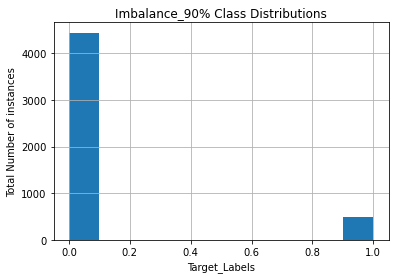

In [36]:
# 90% imbalance target feature plot
y_90.hist() 
plt.title('Imbalance_90% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_90% Class Distributions.jpg')

In [37]:
#Training with 90% imbalance surrogate
skf.get_n_splits(X_90, y_90)
score = []
precision = []
recall = []
for train_index, test_index in skf.split(X_90, y_90):
    #print('Train:' , train_index, 'Validation: ', test_index)
    x_train, x_test = X_90.iloc[train_index], X_90.iloc[test_index]
    y_train, y_test = y_90.iloc[train_index], y_90.iloc[test_index]
    rf_clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf_clf.predict(x_test))
    precision_s = precision_score(y_test, rf_clf.predict(x_test),average='macro')
    recall_s = recall_score(y_test, rf_clf.predict(x_test))
    score.append(acc)
    precision.append(precision_s)
    recall.append(recall_s)

In [38]:
#Metrics @ 90%
print('Mean Accuracy Score: {}'.format(np.array(score).mean()))
print('Mean Precision Score: {}'.format(np.array(precision).mean()))
print('Mean Recall Score: {}'.format(np.array(recall).mean()))

Mean Accuracy Score: 0.9387551223197642
Mean Precision Score: 0.968148936908151
Mean Recall Score: 0.38999999999999996


## Part 3

In [39]:
x_train = []
x_test = []
y_train = []
y_test = []
skf.get_n_splits(X_65, y_65)
for train_index, test_index in skf.split(X_90, y_90):
    #print('Train:' , train_index, 'Validation: ', test_index)
    xtrain, xtest = X_90.iloc[train_index], X_90.iloc[test_index]
    ytrain, ytest = y_90.iloc[train_index], y_90.iloc[test_index]
    x_train.append(xtrain)
    x_test.append(xtest)
    y_train.append(ytrain)
    y_test.append(ytest)

In [40]:
x_train[0].head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_low,Product_importance_medium,Gender_M,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
444,10609,3,1,133,3,10,5640,0,0,1,0,1,0,0,0,1
445,9233,3,3,264,2,6,4102,0,1,0,0,1,0,1,0,1
446,8927,6,2,255,4,3,1355,0,1,0,0,0,1,0,0,1
447,4540,2,4,255,7,10,5875,1,0,0,0,1,0,1,0,1
448,6253,5,2,241,2,6,4741,0,0,1,0,0,1,1,0,1


## Part 4

### Elbow Method

In [43]:
wss_score = [[] for col in range(9) for row in range(9)]
for i in range(0,9):
    for j in range(2, 12):
        kmeans=cluster.KMeans(n_clusters=j,init="k-means++")
        kmeans=kmeans.fit(x_train[i])
        wss_iter = kmeans.inertia_
        wss_score[i].append(wss_iter)

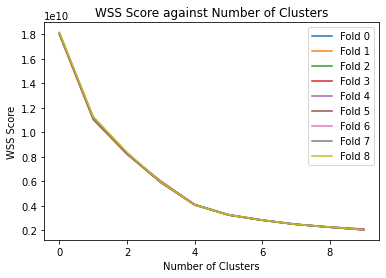

In [44]:
for i in range(0,9):
    plt.plot(wss_score[i], label= 'Fold {}'.format(i))
    plt.xlabel('Number of Clusters')
    plt.ylabel('WSS Score')
    plt.title('WSS Score against Number of Clusters')
    plt.legend()
    plt.savefig('Elbow_plot_E_commerce.jpg')

### Silhouette Method

In [3]:
from sklearn.metrics import silhouette_score

In [5]:
scores_arr = [[] for col in range(9) for row in range(9)]
for i in range(0,9):
    for j in range(2, 12):
        labels=cluster.KMeans(n_clusters=j,init="k-means++",random_state=200).fit(x_train[i]).labels_
        scores = silhouette_score(x_train[i],labels,metric="euclidean",sample_size=1000,random_state=200)
        scores_arr[i].append(scores)

NameError: name 'cluster' is not defined

In [ ]:
for i in range(0,9):
    max_value = max(scores_arr[i])
    max_index = scores_arr[i].index(max_value)
    print('For Cluster {}, the maximum score is at index: {}'.format(i, max_index))

In [ ]:
# Visualizing Silhouette scores for the different folds
for i in range(0,9):
    plt.plot(scores_arr[i], label= 'Fold {}'.format(i))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score against Number of Clusters')
    plt.xlim([2, 10])
    plt.legend()
    plt.savefig('Silhouette_plot_E_Commerce.jpg')

In [ ]:
plt.figure.savefig("output_e_com_sil.png")

### K-Means

In [ ]:
clusters_arr = [[] for col in range(9) for row in range(len(x_train[1]))]
kmeans = cluster.KMeans(n_clusters=2 ,init="k-means++")
for i in range(0,9):
    kmeans = kmeans.fit(x_train[i])
    clusters = kmeans.labels_
    clusters_arr[i].append(clusters)

In [ ]:
dftest = x_train[8]
dftest['pred_labels'] = np.transpose(clusters_arr[8])
dftest['true_labels'] = y_train[8]
dftest.head()

In [ ]:
dftest1 = dftest[dftest['pred_labels'].isin([1])]
dftest1.head()

In [ ]:
accuracy_score(dftest1['true_labels'], dftest1['pred_labels'])

In [ ]:
dftest1['true_labels'].value_counts() #There are 33 minority labels(belong to cluster 0)

In [ ]:
dftest_1 = dftest1[dftest1['true_labels'].isin([0])]
dftest_1['true_labels'].value_counts()

In [ ]:
dftest0 = dftest[dftest['pred_labels'].isin([0])]
dftest0.head()

In [ ]:
dftest_0 = dftest0[dftest0['true_labels'].isin([1])]
dftest_0['true_labels'].value_counts()

In [ ]:
#Combining the datasets
df_new = pd.concat([dftest_0, dftest_1], axis=0)
df_new.head()

In [ ]:
df_new['true_labels'].value_counts()

In [ ]:
#Training Random forest classifier
del df_new['pred_labels']

In [ ]:
df_new.head()

In [ ]:
x = df_new.loc[:, df_new.columns != 'true_labels']
y = df_new['true_labels']

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = 42)
rf_clf.fit(x, y)

In [ ]:
print('RF Train accuracy: {}'.format(accuracy_score(y, rf_clf.predict(x))))

In [ ]:
## Assigning clusters to unseen fold
kmeans = cluster.KMeans(n_clusters=2 ,init="k-means++")
kmeans = kmeans.fit(x_train[8])
clusters = kmeans.labels_
clusters

In [ ]:
accuracy_score(y_train[8],clusters)

In [ ]:
df_x = x_train[8]
df_x['labels'] = clusters
print(df_x.shape)
df_x.head()

In [ ]:
arr = []
for i in range(len(df_x)):
    res = df_x['labels'].iloc[i] == df_x['true_labels'].iloc[i]
    arr.append(res)

In [ ]:
df_x['bool'] = arr
df_x = df_x[df_x['bool'].isin([False])]
df_x.shape

In [ ]:
df_x.head()

In [ ]:
del df_x['pred_labels']
del df_x['labels']
del df_x['bool']

In [ ]:
## Random Forest
x = df_x.loc[:, df_x.columns != 'true_labels']
y = df_x['true_labels']
accuracy_score(y, rf_clf.predict(x))